<a href="https://colab.research.google.com/github/jvaug30/Food-Sales-Prediction/blob/main/Food_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Food Sales Prediction Project
- Jacob Vaughn

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
filename = '/content/drive/MyDrive/00 Data/Stack One/sales_predictions.csv'
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# 1. How many rows and columns?
# 2. What are the data types of each variable?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
# 3. Are there duplicates? If so, drop any duplicates.
df.duplicated().any()

False

In [6]:
# 4. Identify missing values.
df[df.isnull().values]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.20,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.20,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
...,...,...,...,...,...,...,...,...,...,...,...,...
8504,NCN18,NaN,Low Fat,0.124111,Household,111.7544,OUT027,1985,Medium,Tier 3,Supermarket Type3,4138.6128
8508,FDW31,11.35,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.10,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.00,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [7]:
# 5. Decide on how to address the missing values and do it! (this requires your judgement, so explain your choice).
# I chose to use a '0' to fill in NaN values under column Item_Weight. This would allow the column to remain a float64 to avoid overwriting it to be a dtype object.
# As for Outlet_Size, '0' wouldn't make sense as it would suggest that the outlet has no size, when one can determine that it must have size by reviewing Outlet_Type.
#df['Item_Weight'].fillna(0, inplace=True)
#df['Outlet_Size'].fillna('N/A', inplace=True)
#df.fillna(0, inplace=True)
# I used two ways to fill NaN values. I find the one below easier than the one above.
df.fillna({'Item_Weight': 0, 'Outlet_Size': 'N/A'}, inplace=True)
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,N/A,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,N/A,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [8]:
# 6. Confirm that there are no missing values afer addressing them.
df[df.isnull().values]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [9]:
# 7. Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent).
replace_Item_Fat_Content = {'reg': 'Regular', 'low fat': 'Low Fat', 'LF': 'Low Fat'}
df.Item_Fat_Content = df.Item_Fat_Content.replace(replace_Item_Fat_Content)
df.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

In [10]:
# 8. For any numerical columns, obtain the summary statistics of each (min, max, mean).
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.650590,0.066132,140.992782,1997.831867,2181.288914
std,6.431899,0.051598,62.275067,8.371760,1706.499616
min,0.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

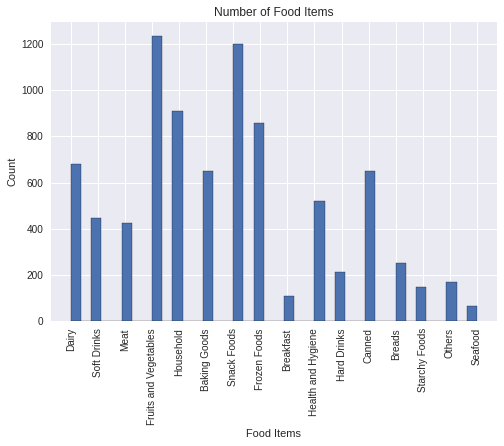

In [12]:
plt.style.use('seaborn')
df['Item_Type'].hist(bins = 40,
                     edgecolor='black')
plt.xticks(rotation = 90)
plt.xlabel('Food Items')
plt.ylabel('Count')
plt.title('Number of Food Items');

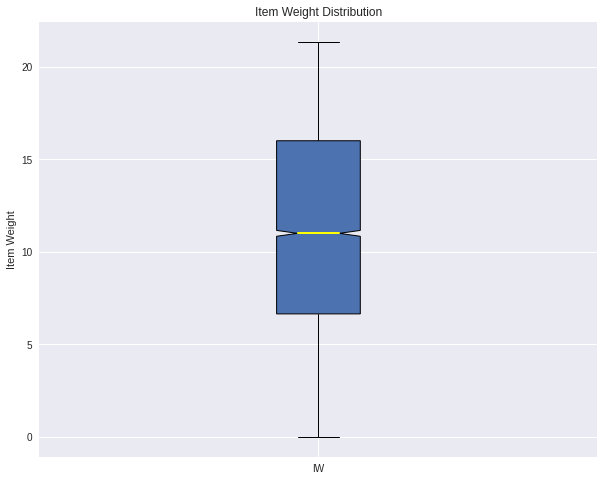

In [13]:
fig, axes = plt.subplots(figsize=(10,8))
boxplots = axes.boxplot(df['Item_Weight'],
                           notch=True,
                           labels=['IW'],
                           patch_artist=True,
                           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'))
plt.ylabel('Item Weight')
plt.title('Item Weight Distribution');

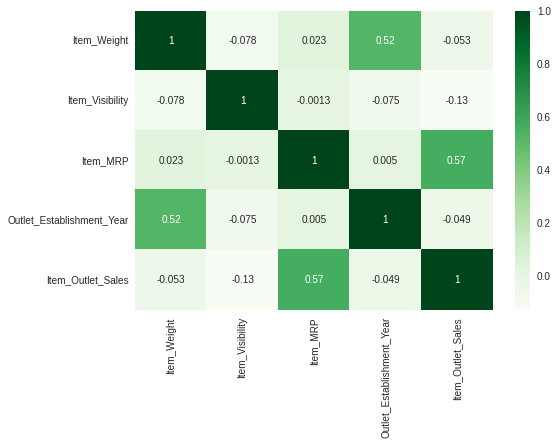

In [14]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Greens', annot = True);

In [15]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,N/A,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [16]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

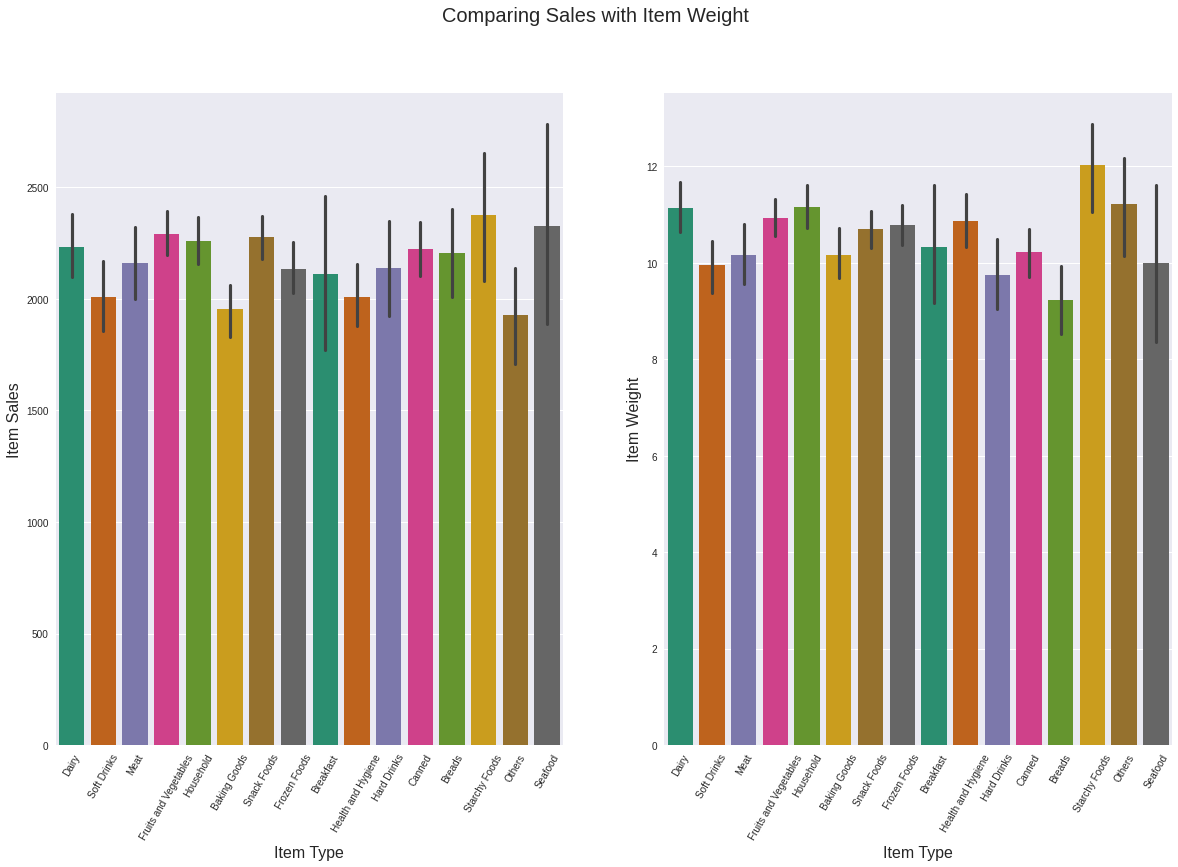

In [29]:
fig, axes = plt.subplots(ncols=2, figsize=(20,12))
axes[0] = sns.barplot(data=df, x='Item_Type', y='Item_Outlet_Sales', ax=axes[0], palette='Dark2');
plt.setp(axes[0].get_xticklabels(), rotation=60)
axes[0].set_xlabel('Item Type', fontsize=16)
axes[0].set_ylabel('Item Sales', fontsize=16)
sns.barplot(data=df, x='Item_Type', y='Item_Weight', ax=axes[1], palette='Dark2');
plt.setp(axes[1].get_xticklabels(), rotation=60)
axes[1].set_xlabel('Item Type', fontsize=16)
axes[1].set_ylabel('Item Weight', fontsize=16)
fig.suptitle('Comparing Sales with Item Weight', fontsize=20);

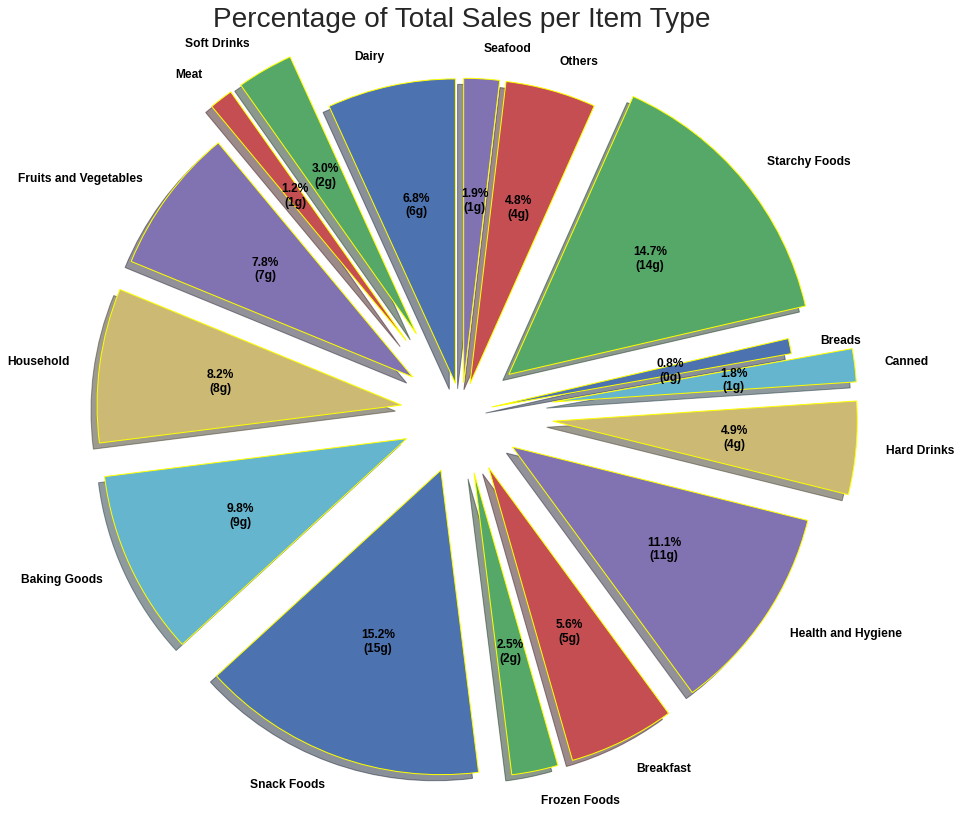

In [18]:
# https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html
# https://www.geeksforgeeks.org/plot-a-pie-chart-in-python-using-matplotlib/
# https://www.geeksforgeeks.org/how-to-use-color-palettes-in-python-bokeh/
df_Total_Sales = df['Item_Outlet_Sales'].sum()
df_Item_Type = df['Item_Outlet_Sales'].groupby(df['Item_Type']).sum()
pct = df_Item_Type/df_Total_Sales
pct
explode = (0.1, 0.3, 0.3, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.3, 0.3, 0.1, 0.2, 0.1, 0.1)
wp = {'linewidth' : 1, 'edgecolor' : 'yellow',}
def func(pct):
  absolute = int(pct)
  return '{:.1f}%\n({:d}g)'.format(pct, absolute)
fig, axes = plt.subplots(figsize=(18,14))
axes.pie(pct,
         autopct = lambda pct: func(pct),
         explode = explode,
         labels = df['Item_Type'].unique(),
         shadow = True,
         startangle=90,
         wedgeprops = wp,
         textprops = dict(color ='k', weight= 'bold', fontsize=12));
axes.set_title('Percentage of Total Sales per Item Type', fontsize = 28);

In [46]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')
fn_two = '/content/drive/MyDrive/00 Data/Stack One/sales_predictions.csv'
df_ML = pd.read_csv(fn_two)
df_ML.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138


In [47]:
df_ML.isna().any()

Item_Identifier              False
Item_Weight                   True
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

In [48]:
# Identify the target (y) and features (X): Assign the 'Item_Outlet_Sales' column as your target and the rest of the relevant variables as your features matrix.
X = df_ML.drop(columns=['Item_Identifier', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Item_Outlet_Sales'])
y = df_ML['Item_Outlet_Sales']

In [49]:
# Perfrom train test splt.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [51]:
# Create a pre processing pipeline to prepare the dataset for Machine Learning.

# Column Selectors

# Numeric selector
num_selector = make_column_selector(dtype_include='number')
# Categorical selector
cat_selector = make_column_selector(dtype_include='object')

# Transformers

# Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')
# Scaler
scaler = StandardScaler()
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Pipelines

# Numeric pipeline
numeric_pipeline = make_pipeline(mean_imputer, scaler)
# Categorical pipeline
categorical_pipeline = make_pipeline(freq_imputer, ohe)

# ColumnTransformer

# Tuples for column transformer
number_tuple = (numeric_pipeline, num_selector)
categorical_tuple = (categorical_pipeline, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, categorical_tuple)

# Transformer Data

# Fit on train
preprocessor.fit(X_train)
# Transform train and test data
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Inspect the result

# Check for missing values and that data is scaled/one-hot encoded
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in test data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in test data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6392, 33)




array([[ 0.81724868, -0.71277507,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.5563395 , -1.29105225,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [-0.13151196,  1.81331864,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.11373638, -0.92052713,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 1.76600931, -0.2277552 ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.81724868, -0.95867683,  1.        , ...,  1.        ,
         0.        ,  0.        ]])